# Load Dataset

In [32]:
import pandas as pd

In [33]:
data = pd.read_csv("data/dataSet.csv")

In [34]:
data.shape

(9000, 2)

In [35]:
data.head()

,Comment,Label
0,"মুভির ট্রেলার দেখে ভালোই লেগেছে, তবে কিছু কিছু...",2.0
1,"কিছু দৃশ্য খুব ভালো ছিল, কিন্তু চরিত্রগুলোর মধ...",2.0
2,"অভিনয় মোটামুটি ভালো, তবে প্রডাকশন ভীষণ ভালো হত...",2.0
3,"গল্পটা ঠিকঠাক, তবে কিছু জায়গায় লম্বা মনে হয়েছে।",2.0
4,"সুরের সাথে সাথে দৃশ্যগুলোও ভালো লেগেছে, তবে কি...",2.0


# Preparing & Splitting Data

In [36]:
data.isnull().sum()

Comment    0
Label      0
dtype: int64

In [37]:
data['Label'] = data['Label'].replace({0.0 : 'Negative', 1.0 : 'Positive', 2.0 : 'Neutral'})

In [38]:
data.head()

,Comment,Label
0,"মুভির ট্রেলার দেখে ভালোই লেগেছে, তবে কিছু কিছু...",Neutral
1,"কিছু দৃশ্য খুব ভালো ছিল, কিন্তু চরিত্রগুলোর মধ...",Neutral
2,"অভিনয় মোটামুটি ভালো, তবে প্রডাকশন ভীষণ ভালো হত...",Neutral
3,"গল্পটা ঠিকঠাক, তবে কিছু জায়গায় লম্বা মনে হয়েছে।",Neutral
4,"সুরের সাথে সাথে দৃশ্যগুলোও ভালো লেগেছে, তবে কি...",Neutral


In [39]:
X = data["Comment"]
y = data["Label"]

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_en = le.fit_transform(y)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_en, test_size=0.2, random_state=42)

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
vct = CountVectorizer()
X_train_vct = vct.fit_transform(X_train)
X_test_vct = vct.transform(X_test)

In [43]:
import numpy as np
X_train_vct_float = X_train_vct.astype(np.float32)
X_test_vct_float = X_test_vct.astype(np.float32)

# Build Model

In [51]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

model = LGBMClassifier()
model.fit(X_train_vct_float, y_train)
y_pred = model.predict(X_test_vct_float)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 743
[LightGBM] [Info] Number of data points in the train set: 7200, number of used features: 271
[LightGBM] [Info] Start training from score -1.104044
[LightGBM] [Info] Start training from score -1.104463
[LightGBM] [Info] Start training from score -1.087425


# Hyperparameter Tuning

In [89]:
model = LGBMClassifier(force_col_wise=True, objective= 'multiclass', boosting_type='gbdt', learning_rate=0.01, n_estimators=100)
model.fit(X_train_vct_float, y_train)
y_pred = model.predict(X_test_vct_float)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy : {acc}")

[LightGBM] [Info] Total Bins 743
[LightGBM] [Info] Number of data points in the train set: 7200, number of used features: 271
[LightGBM] [Info] Start training from score -1.104044
[LightGBM] [Info] Start training from score -1.104463
[LightGBM] [Info] Start training from score -1.087425
Accuracy : 0.6583333333333333


In [93]:
model = LGBMClassifier(force_col_wise=True, objective= 'multiclass', boosting_type='gbdt', learning_rate=0.1, n_estimators=150)
model.fit(X_train_vct_float, y_train)
y_pred = model.predict(X_test_vct_float)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy : {acc}")

[LightGBM] [Info] Total Bins 743
[LightGBM] [Info] Number of data points in the train set: 7200, number of used features: 271
[LightGBM] [Info] Start training from score -1.104044
[LightGBM] [Info] Start training from score -1.104463
[LightGBM] [Info] Start training from score -1.087425
Accuracy : 0.6744444444444444


In [118]:
model = LGBMClassifier(force_col_wise=True, objective= 'multiclass', boosting_type='gbdt', learning_rate=0.05, n_estimators=190)
model.fit(X_train_vct_float, y_train)
y_pred = model.predict(X_test_vct_float)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy : {acc}")

[LightGBM] [Info] Total Bins 743
[LightGBM] [Info] Number of data points in the train set: 7200, number of used features: 271
[LightGBM] [Info] Start training from score -1.104044
[LightGBM] [Info] Start training from score -1.104463
[LightGBM] [Info] Start training from score -1.087425
Accuracy : 0.6922222222222222


In [113]:
model = LGBMClassifier(force_col_wise=True, learning_rate=0.05, n_estimators=50, num_leaves=9)
model.fit(X_train_vct_float, y_train)
y_pred = model.predict(X_test_vct_float)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy : {acc}")

[LightGBM] [Info] Total Bins 743
[LightGBM] [Info] Number of data points in the train set: 7200, number of used features: 271
[LightGBM] [Info] Start training from score -1.104044
[LightGBM] [Info] Start training from score -1.104463
[LightGBM] [Info] Start training from score -1.087425
Accuracy : 0.6527777777777778


# Best Result 

In [119]:
model = LGBMClassifier(force_col_wise=True, objective= 'multiclass', boosting_type='gbdt', learning_rate=0.05, n_estimators=190)
model.fit(X_train_vct_float, y_train)
y_pred = model.predict(X_test_vct_float)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy : {acc}")

[LightGBM] [Info] Total Bins 743
[LightGBM] [Info] Number of data points in the train set: 7200, number of used features: 271
[LightGBM] [Info] Start training from score -1.104044
[LightGBM] [Info] Start training from score -1.104463
[LightGBM] [Info] Start training from score -1.087425
Accuracy : 0.6922222222222222


In [122]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       613
           1       0.71      0.68      0.69       614
           2       0.71      0.74      0.73       573

    accuracy                           0.69      1800
   macro avg       0.69      0.69      0.69      1800
weighted avg       0.69      0.69      0.69      1800



In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

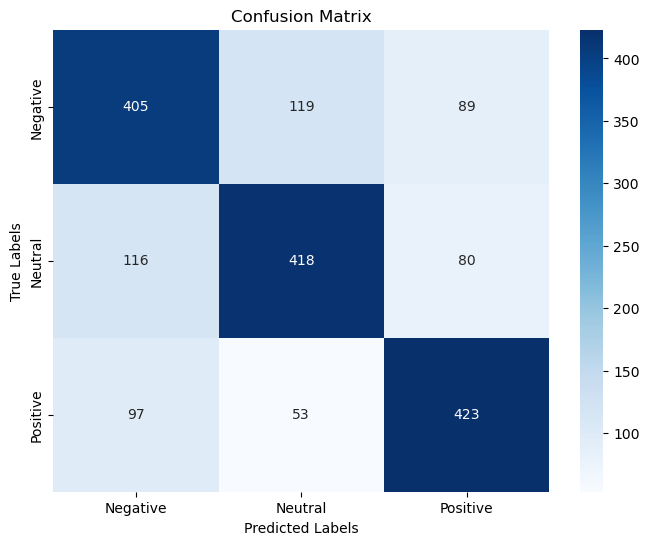

In [124]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()